rna_attP-int1_UTR1_GFP_T16m_attP-int1_UTR1_RFP_T16m
{UTR1: [GFP]}
original construct


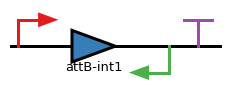

rna:
{pconst: rna_attB-int1_pconst-r_T16m, pconst-r: rna_attB-int1-r_pconst-r}
protein
{rna_attB-int1_pconst-r_T16m: {}, rna_attB-int1-r_pconst-r: {}}


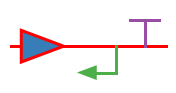

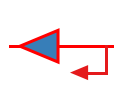

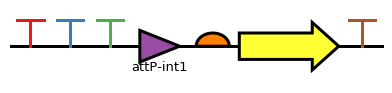

rna:
{}
protein
{}
[dna_pconst, dna_pconst-r_T16m]
choose site 1


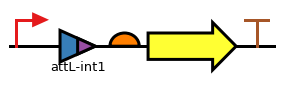

rna:
{pconst: rna_attL-int1_UTR1_GFP_T16m}
protein
{rna_attL-int1_UTR1_GFP_T16m: {UTR1: [GFP]}}


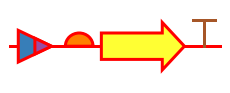

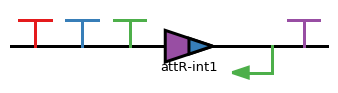

rna:
{pconst-r: rna_attR-int1-r_T16m-r_T16m-r_T16m-r}
protein
{rna_attR-int1-r_T16m-r_T16m-r_T16m-r: {}}


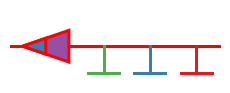

In [1]:
from biocrnpyler import *
import numpy as np
import dnaplotlib as dpl
%matplotlib inline
dna_render = dpl.DNARenderer(scale = 5,linewidth=3)
rna_render = dpl.DNARenderer(scale = 5,linewidth=3,linecolor=(1,0,0))
dna_parts = dna_render.SBOL_part_renderers()
rna_parts = rna_render.SBOL_part_renderers()


ptet = DNA_part("ptet",RegulatedPromoter,{"part_type":"promoter","regulator":"tetr"})

plac = DNA_part("plac",RegulatedPromoter,{"part_type":"promoter","regulator":"laci"})

pconst = DNA_part("pconst",Promoter,{"part_type":"promoter"})

attB = DNA_part("attB",None,{"part_type":"attB","no_stop_codons":["forward","reverse"]})
attP = DNA_part("attP",None,{"part_type":"attP","no_stop_codons":["forward","reverse"]})

attL = DNA_part("attL",None,{"part_type":"attL","no_stop_codons":["forward","reverse"]})
attR = DNA_part("attR",None,{"part_type":"attR","no_stop_codons":["forward","reverse"]})

utr1 = DNA_part("UTR1",RBS,{"part_type":"rbs"})
utr2 = DNA_part("UTR2",RBS,{"part_type":"rbs"})

gfp = DNA_part("GFP",Protein,{"part_type":"CDS","protein":"GFP"})

rfp = DNA_part("RFP",Protein,{"part_type":"CDS","protein":"RFP"})
yfp = DNA_part("YFP",Protein,{"part_type":"CDS","protein":"YFP"})

t16 = DNA_part("T16m",None,{"part_type":"terminator"})

parts = [ptet,plac,pconst,attB,attP,utr1,utr1,utr1,gfp,gfp,rfp,rfp,t16]

test_construct = [[pconst,"forward"],[attB,"forward"],[t16,"forward"],\
                    [attP,"forward"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"],\
                    [attP,"forward"],[utr1,"forward"],[rfp,"forward"],[t16,"forward"]]

tc1 = [[pconst,"forward"],[attB,"forward"],[pconst,"reverse"],[t16,"forward"]]
tc2 = [[t16,"forward"],[t16,"forward"],[t16,"forward"],[attP,"forward"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"]]
trna1 = [[attP,"forward"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"],\
                    [attP,"forward"],[utr1,"forward"],[rfp,"forward"],[t16,"forward"]]

trna1_const =  RNA_construct(trna1)
tprots = trna1_const.explore_txtl()
print(trna1_const)
print(tprots)
#test_construct_2 = [[pconst,"reverse"],[attB,"forward"],[t16,"forward"]]
x = DNA_construct(test_construct,circular=False)

x = DNA_construct(tc1,circular=False)
y = DNA_construct(tc2,circular=False)
site1 = x.parts_list[1]
site2 = y.parts_list[3]
#site1 = x.parts_list[1]
#site3 = x.parts_list[3]
#site2 = x.parts_list[7]

#print([a.color for a in x.parts_list])

bxb1_mech = IntegraseMechanism("bxb1")
print("original construct")
plotConstruct(x,plot_rnas=True,debug=True)
plotConstruct(y,plot_rnas=True,debug=True)
z = bxb1_mech.integrate(site1,site2)
print("choose site 1")
for const in z:
    plotConstruct(const,plot_rnas=True,debug=True)

#z = bxb1_mech.integrate(site1,site2)
#print("choose site 2")
#for const in z:
#    plotConstruct(const,plot_rnas=True)

#print(a)
#for promoter in a.keys():
#    plotDesign(DNA_construct(a[promoter]).dnaplotlib_design(),#renderer=rna_render)
#print(a)
#print(b)
#plotDesign(y.dnaplotlib_design(),renderer=dna_render)
#for promoter in c.keys():
#    plotDesign(DNA_construct(c[promoter]).dnaplotlib_design(),#renderer=rna_render)
#print(c)
#print(d)